In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
%matplotlib inline

# all GENIE CC interactions
Oct 23, 2017

In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/GENIECCInteractions/'

# µp-events: general features
### To this end, we collect all CC events in which at least one proton was produced together with the muon

In [3]:
GENIEall = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/genie/prodgenie_bnb_nu_uboone_overlay_mcc8_reco2_genie.csv')
print len(GENIEall),'CC interactions pairs in GENIE'

73485 CC interactions pairs in GENIE


In [4]:
GENIEall.columns

Index([u'Unnamed: 0', u'run', u'subrun', u'event', u'IsInActiveVolume',
       u'Is1mu1p', u'IsCC1p0pi', u'Is_mu_TrackReconstructed',
       u'Is_p_TrackReconstructed', u'IsVertexReconstructed', u'IsCCQE',
       u'truth_Pmu', u'truth_Pmu_theta', u'truth_Pp', u'truth_Pp_theta',
       u'reconstructed mu-p distance'],
      dtype='object')

In [5]:
mupGENIEtypes = ['Is1mu1p'        , 'IsCC1p0pi'      ,'IsInActiveVolume'             ,'Is_mu_TrackReconstructed' ,'Is_p_TrackReconstructed','IsVertexReconstructed' , 'IsCCQE']
mupGENIElabels= ['r$\mu p$'       ,r'$CC1{p}0_{\pi}$', '$\\nu$-int. in active volume','$\\mu$ reconstructed'     ,'$p$ reconstructed'      ,'$\\mu,p$ reconstructed', 'CCQE']
mupGENIEcolors= ['forestgreen'    ,'blue'           , 'red'                         , 'green'                   , 'black'                 , 'purple'               , 'orange']
mupGENIEsamples=[]

In [6]:
print
mupGENIE=dict()
for pair_type,label in zip(mupGENIEtypes,mupGENIElabels):
    mupGENIE[pair_type] = GENIEall[GENIEall[pair_type]==True]
    mupGENIEsamples.append(mupGENIE[pair_type])
    Ntype = len(mupGENIE[pair_type])
    print Ntype,'are '+label+', %.1f'%(100.*float(Ntype)/len(GENIEall))+'%'


60 are r$\mu p$, 0.1%
19134 are $CC1{p}0_{\pi}$, 26.0%
32913 are $\nu$-int. in active volume, 44.8%
34458 are $\mu$ reconstructed, 46.9%
12372 are $p$ reconstructed, 16.8%
9746 are $\mu,p$ reconstructed, 13.3%
32750 are CCQE, 44.6%


In [ ]:
# events in which the muon was detected and the proton was undetected
mupGENIE['pUnreconstructed'] = mupGENIEall[(mupGENIEall['IsVertexContained']==True)
                                           &(mupGENIEall['IsProtonReconstructed']==False)]  
print len(mupGENIE['pUnreconstructed']),'are pUnreconstructed, %.1f'%(100.*float(len(mupGENIE['pUnreconstructed']))/len(mupGENIEall))+'%'
mupGENIE['muReconstructed_pUnreconstructed'] = mupGENIEall[(mupGENIEall['IsVertexContained']==True)
                                                           &(mupGENIEall['IsMuonReconstructed']==True)
                                                           &(mupGENIEall['IsProtonReconstructed']==False)]    
print len(mupGENIE['muReconstructed_pUnreconstructed']),'are muReconstructed_pUnreconstructed, %.1f'%(100.*float(len(mupGENIE['muReconstructed_pUnreconstructed']))/len(mupGENIEall))+'%'

769      0
2200     0
3428     0
3790     0
6046     0
8213     0
9023     0
10659    0
11542    0
11808    0
13340    0
13494    0
14246    0
14967    0
15374    0
15457    0
16205    0
16508    0
17309    0
19079    0
19587    0
20458    0
20621    0
20789    0
20973    0
22213    0
22598    0
23853    0
25124    0
27249    0
29983    0
31090    0
31299    0
36497    0
37564    0
40310    0
40582    0
41453    0
41625    0
41744    0
44346    0
46875    0
47189    0
47600    0
49223    0
55279    0
55419    0
57310    0
57854    0
57948    0
59898    0
61867    0
64463    0
65806    0
66282    0
67849    0
68845    0
69879    0
72934    0
73218    0
Name: reconstructed mu-p distance, dtype: int64


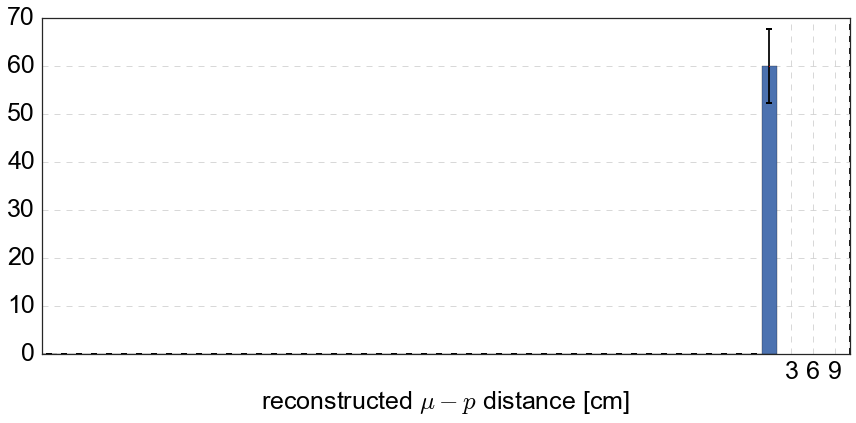

In [16]:
# fig:mup_distance
# x = mupGENIE['IsCC_1p_200MeVc']['distance']
x = GENIEall[GENIEall['Is1mu1p']==True]['reconstructed mu-p distance']
print x
fig,ax=plt.subplots(figsize=(12,6))
h,bins,_=ax.hist(x,bins=np.linspace(-100,1,50)) ; mid = bins[1:] - 0.5*(bins[1]-bins[0])
plt.errorbar(mid,h,yerr=np.sqrt(h),fmt='o',markersize=1, color='red' , ecolor='black', capthick=2)
set_axes(ax,'reconstructed $\\mu-p$ distance [cm]' , '', fontsize=25 ,xticks=[3,6,9,12])
ax.grid(linestyle='--',alpha=0.75)
plt.plot([11,11],ax.get_ylim(),'--',color='black')
plt.tight_layout()
plt.savefig(figures_path+'mup_distance.pdf')
# how many of the µp pairs are retained for a cut < 11 cm?
# print 100.*float(len(mupGENIE['IsCC_1p_200MeVc'][mupGENIE['IsCC_1p_200MeVc']['distance']<11]))/len(mupGENIE['IsCC_1p_200MeVc']),'%'

In [8]:
Ncontained = len(mupGENIE['IsVertexContained'])
for pair_type,label in zip(['IsVertexContained','IsMuonReconstructed' ,'IsVertexReconstructed' ],
                           ['CC$N_{p}$ vertex  with $N_{p}>0$ contained in (active volume of) the detector'
                            ,'\muon\ track reconstructed and contained in FV'
                            ,'\muon\ and at least one p tracks reconstructed and contained in FV']):
    Ntype = len(mupGENIE[pair_type])
    print Ntype,'are '+label+', %.1f'%(100.*float(Ntype)/Ncontained)+'%'

24867 are CC$N_{p}$ vertex  with $N_{p}>0$ contained in (active volume of) the detector, 100.0%
18070 are \muon\ track reconstructed and contained in FV, 72.7%
7563 are \muon\ and at least one p tracks reconstructed and contained in FV, 30.4%


## un-reconstructed events

In [9]:
## ~50% of the µp interactions are contained in the detector
### in ~70% out of which, the µ was reconstructed (not necessarily contained)
### however only in ~ 35% of which, the proton tracks are reconstructed - where are all the unreconstructed protons?

In [10]:
def plot_proton_reco_unreco(var='truth_Pp_theta',xlabel='truth $\\theta_{p}$ [deg.]',mul=1,bins=np.linspace(0,180,45),xticks=np.linspace(0,180,7)):
    fig,ax=plt.subplots(figsize=(12,6))
    for gtype,label,color in zip(['IsMuonReconstructed','IsProtonReconstructed']#,'pUnreconstructed']
                             ,['all protons','proton reconstructed']#,'proton not-reconstructed']
                             ,['black','royalblue','salmon']):
        x = mul*mupGENIE[gtype][var]
        h , edges = np.histogram(x,bins=bins); mid = 0.5*(bins[1:] + bins[:-1]) 
        y = h.astype(float)# /len(x)
        yerr=1./np.sqrt(h)#/len(x)
        ax.errorbar( mid, y, yerr=yerr, xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)
    
    set_axes(ax,xlabel , 'counts', fontsize=25,xticks=xticks)
    ax.legend(loc='upper right',fontsize=25,markerscale=2.)
    ax.grid(linestyle='--',alpha=0.5)
    plt.tight_layout()
    plt.savefig(figures_path+'ProtonRecoUnreco_'+var+'.pdf')

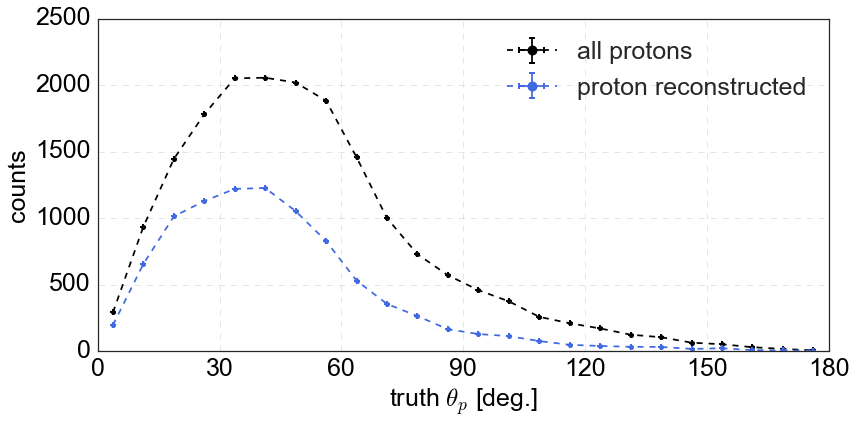

In [11]:
plot_proton_reco_unreco(var='truth_Pp_theta',xlabel='truth $\\theta_{p}$ [deg.]'
                        ,mul=180./np.pi,bins=np.linspace(0,180,25),xticks=np.linspace(0,180,7))

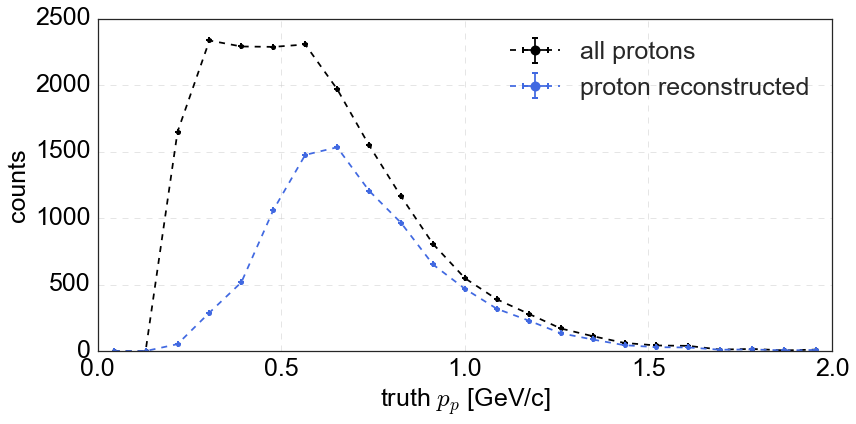

In [12]:
plot_proton_reco_unreco(var='truth_Pp',xlabel='truth $p_{p}$ [GeV/c]',bins=np.linspace(0,2,24),xticks=np.linspace(0,2,5))

# pairs of tracks at close proximity

In [13]:
MCbnbDATAcosmicPairsFV, MCbnbDATAcosmicSamples = load_MCbnbDATAcosmicSamples()

50859 pairs from MC-BNB + cosmic DATA overlay
30325 pairs in FV
3806 are 1mu-1p, 12.6%
3995 are other pairs, 13.2%
22524 are cosmic, 74.3%
--------------------------------------------------------------
1232 are CC 1p 0pi, 4.1%


In [14]:
MCbnbMCcosmicPairsFV, MCbnbMCcosmicSamples = load_MCbnbMCcosmicSamples()

138749 pairs from MC-BNB + cosmic MC overlay
95676 pairs in FV
19573 are 1mu-1p, 20.5%
16269 are other pairs, 17.0%
59944 are cosmic, 62.7%
--------------------------------------------------------------
7561 are CC 1p 0pi, 7.9%


## # 2TracksClustersContributions

In [15]:
print "copy to"
print "# tab:2TracksClustersContributions (InitialSampleOfEvents.tex)"
print 

for pairsFV,samples in zip([MCbnbDATAcosmicPairsFV]
                           ,[MCbnbDATAcosmicSamples]):
    print "				description				 							& number 	& fraction\
    \\tabularnewline"
    print " 				\hline \hline "
#print "				total number of pairs  				& %d"%len(pairs)+"  		& -\\tabularnewline \hline "
    print "				total number of pairs contained in FV  	& %d"%len(pairsFV)+"  		& 100\%\
    \\tabularnewline \hline"
    print "				\hline \hline"
    print "				\\textcolor{teal}{\mup\ pairs}\
			& \\textcolor{teal}{"+"%d"%len(samples['1mu-1p'])+"}\
	& \\textcolor{teal}{"+"%.1f"%(100.*float(len(samples['1mu-1p']))/len(pairsFV))+"\%"+"} \\tabularnewline \hline\ "
    print "				\\textcolor{red}{other pairs (non \mup)}\
	& \\textcolor{red}{"+"%d"%len(samples['other pairs'])+"}\
	& \\textcolor{red}{"+"%.1f"%(100.*float(len(samples['other pairs']))/len(pairsFV))+"\%"+"} \\tabularnewline \hline"
    print "				\\textcolor{orange}{cosmic pairs}\
		& \\textcolor{orange}{"+"%d"%len(samples['cosmic'])+"}\
	& \\textcolor{orange}{"+"%.1f"%(100.*float(len(samples['cosmic']))/len(pairsFV))+"\%"+"} \\tabularnewline \hline \hline "
    print "				\\textcolor{blue}{true \CCIpOpi}\
			& \\textcolor{blue}{"+"%d"%len(samples['CC 1p 0pi'])+"}\
	& \\textcolor{blue}{"+"%.1f"%(100.*float(len(samples['CC 1p 0pi']))/len(pairsFV))+"\%"+"}"
    print "				\\tabularnewline \hline"
    print 

copy to
# tab:2TracksClustersContributions (InitialSampleOfEvents.tex)

				description				 							& number 	& fraction    \tabularnewline
 				\hline \hline 
				total number of pairs contained in FV  	& 30325  		& 100\%    \tabularnewline \hline
				\hline \hline
				\textcolor{teal}{\mup\ pairs}			& \textcolor{teal}{3806}	& \textcolor{teal}{12.6\%} \tabularnewline \hline\ 
				\textcolor{red}{other pairs (non \mup)}	& \textcolor{red}{3995}	& \textcolor{red}{13.2\%} \tabularnewline \hline
				\textcolor{orange}{cosmic pairs}		& \textcolor{orange}{22524}	& \textcolor{orange}{74.3\%} \tabularnewline \hline \hline 
				\textcolor{blue}{true \CCIpOpi}			& \textcolor{blue}{1232}	& \textcolor{blue}{4.1\%}
				\tabularnewline \hline



## other-pairs (non 1µ-1p) contributions
## # fig:pieChartBackgroundNon1mu1p

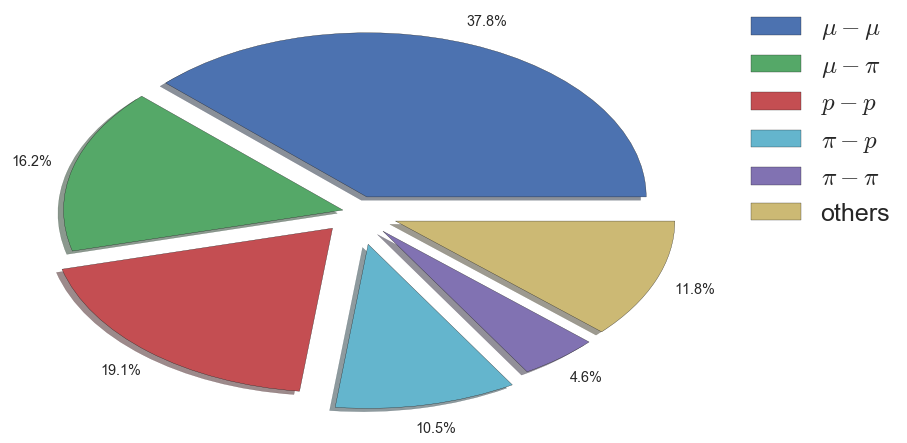

In [16]:
samples = MCbnbDATAcosmicSamples
all_other_pairs = samples['other pairs']
other_pairs_labels       = ['$\mu-\mu$','$\mu-\pi$','$p-p$'    ,'$\pi-p$' ,'$\pi-\pi$'] # ,'$\mu-e$','$\mu-\gamma$'
other_pairs_pdg_products = [13*13      , 13*211    , 2212*2212 , 211*2212 , 211*211   ] # , 13*11   , 13*22
explode                  = [0.1        , 0.05      , 0.13      , 0.2      ,0.15       ] # ,0.1      ,0.1

other_pairs = dict()
all_other_pairs_big_contribution = 0
len_other_pairs = []
for key,product in zip(other_pairs_labels,other_pairs_pdg_products):    
    other_pairs[key] = all_other_pairs[np.abs(all_other_pairs['pdg_short']*all_other_pairs['pdg_long']) == product]
    all_other_pairs_big_contribution += len(other_pairs[key])
    len_other_pairs.append(len(other_pairs[key]))
len_non_categorized = len(all_other_pairs) - all_other_pairs_big_contribution
other_pairs_labels.append('others')
len_other_pairs.append(len_non_categorized)
explode.append(0.15)

# plot
fig=plt.figure(figsize=(10,6))
patches, texts, autotexts = plt.pie( len_other_pairs, pctdistance=1.15,explode=explode,autopct='%1.1f%%',shadow=True)
for t,at in zip(texts,autotexts): 
    t.set_size('xx-large')
    at.set_size('x-large')
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,labels=other_pairs_labels,fontsize=25)
plt.tight_layout()
fig.savefig(figures_path+'pieChartOtherPairs.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

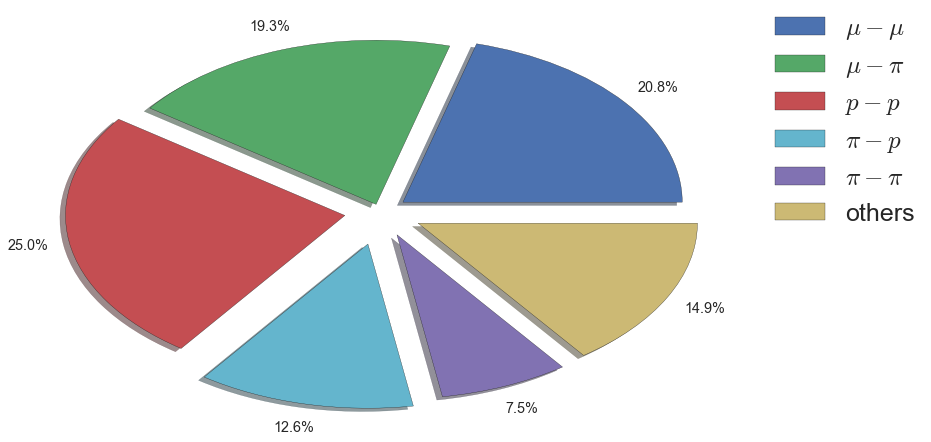

In [17]:
samples = MCbnbMCcosmicSamples
all_other_pairs = samples['other pairs']
other_pairs_labels       = ['$\mu-\mu$','$\mu-\pi$','$p-p$'    ,'$\pi-p$' ,'$\pi-\pi$'] # ,'$\mu-e$','$\mu-\gamma$'
other_pairs_pdg_products = [13*13      , 13*211    , 2212*2212 , 211*2212 , 211*211   ] # , 13*11   , 13*22
explode                  = [0.1        , 0.05      , 0.13      , 0.2      ,0.15       ] # ,0.1      ,0.1

other_pairs = dict()
all_other_pairs_big_contribution = 0
len_other_pairs = []
for key,product in zip(other_pairs_labels,other_pairs_pdg_products):    
    other_pairs[key] = all_other_pairs[np.abs(all_other_pairs['pdg_short']*all_other_pairs['pdg_long']) == product]
    all_other_pairs_big_contribution += len(other_pairs[key])
    len_other_pairs.append(len(other_pairs[key]))
len_non_categorized = len(all_other_pairs) - all_other_pairs_big_contribution
other_pairs_labels.append('others')
len_other_pairs.append(len_non_categorized)
explode.append(0.15)

# plot
fig=plt.figure(figsize=(10,6))
patches, texts, autotexts = plt.pie( len_other_pairs, pctdistance=1.15,explode=explode,autopct='%1.1f%%',shadow=True)
for t,at in zip(texts,autotexts): 
    t.set_size('xx-large')
    at.set_size('x-large')
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,labels=other_pairs_labels,fontsize=25)
plt.tight_layout()

### Anne' comment no.7: what is the source of µµ events? is this broken tracks?
In order to answer, we plot the opening angle
#### # fig:uuPairs_opening_angle

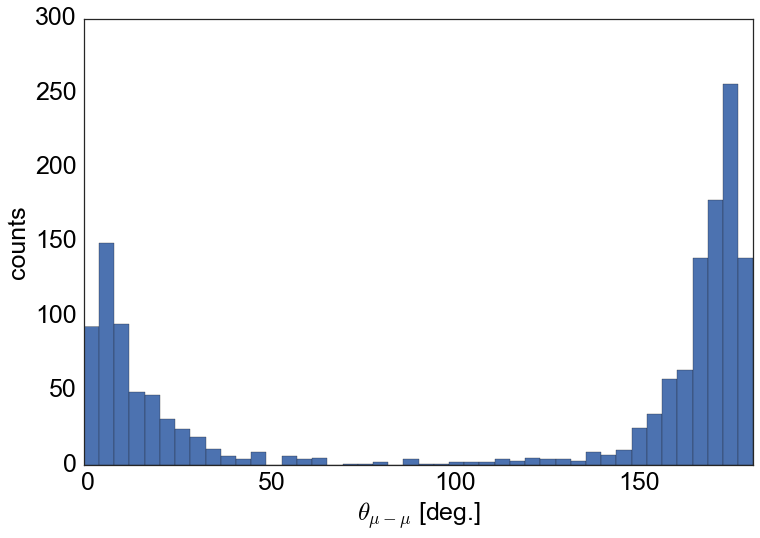

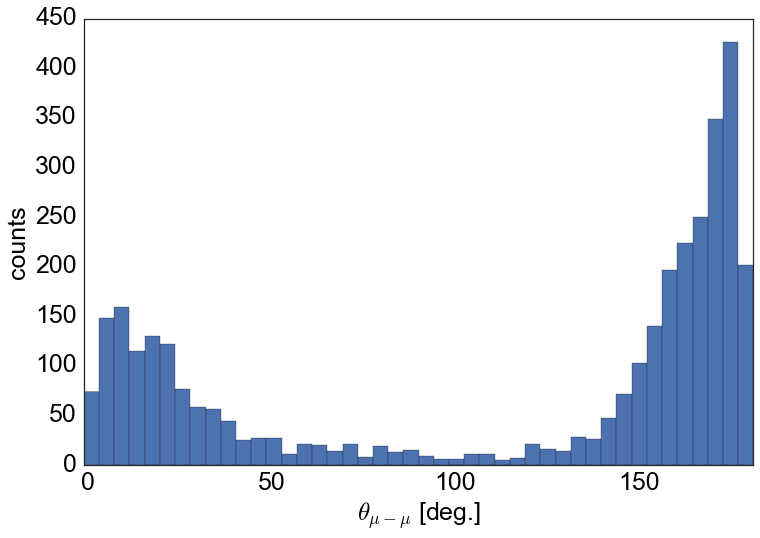

In [18]:
samples = MCbnbDATAcosmicSamples
all_other_pairs = samples['other pairs']
other_pairs['mu-mu'] = all_other_pairs[np.abs(all_other_pairs['pdg_short']*all_other_pairs['pdg_long']) == (13*13)]
fig,ax=plt.subplots(figsize=(12,8))
plt.hist(other_pairs['mu-mu']['theta_12'],bins=np.linspace(-1,181,45));
ax.set_xlim(-1,181);
set_axes(ax,'$\\theta_{\\mu-\\mu}$ [deg.]','counts')
plt.savefig(figures_path+'uuPairs_opening_angle.pdf')

samples = MCbnbMCcosmicSamples
all_other_pairs = samples['other pairs']
other_pairs['mu-mu'] = all_other_pairs[np.abs(all_other_pairs['pdg_short']*all_other_pairs['pdg_long']) == (13*13)]
fig,ax=plt.subplots(figsize=(12,8))
plt.hist(other_pairs['mu-mu']['theta_12'],bins=np.linspace(-1,181,45));
ax.set_xlim(-1,181);
set_axes(ax,'$\\theta_{\\mu-\\mu}$ [deg.]','counts')

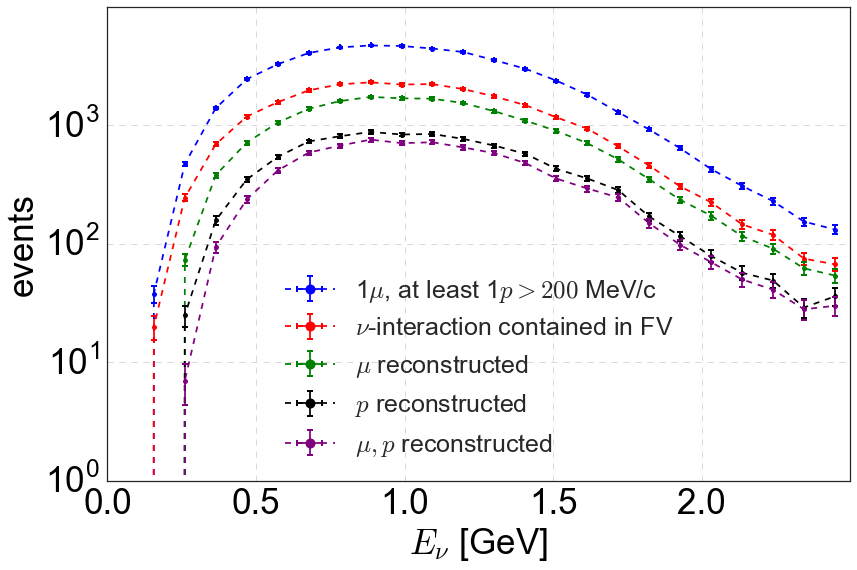

In [19]:
# fig:mupEv
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(0,2.5,25)
for sample,label,color in zip(mupGENIEsamples,mupGENIElabels,mupGENIEcolors):
    h,bins,_=plt.hist(sample['truth_Ev'],bins=bins,histtype='step',linewidth=0)
    mid = 0.5*(bins[1:] + bins[:-1])
    ax.errorbar( mid, h, yerr=np.sqrt(h), xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)
ax.legend(loc='lower center',fontsize=25,markerscale=2.)
ax.grid(linestyle='--',alpha=0.75)
set_axes(ax,x_label='$E_{\\nu}$ [GeV]',y_label='events',fontsize=35)
ax.xaxis.set_ticks(np.linspace(0,2,5))
ax.set_yscale('log'); ax.yaxis.set_ticks([1,10,100,1000])
plt.tight_layout()
plt.savefig(figures_path+'mupEv.pdf')

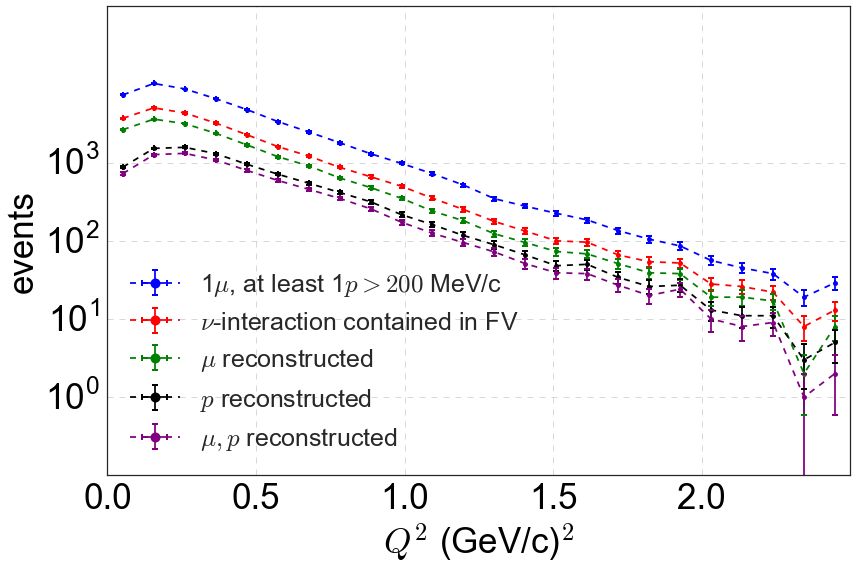

In [20]:
# fig:mupQ2
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(0,2.5,25)
for sample,label,color in zip(mupGENIEsamples,mupGENIElabels,mupGENIEcolors):
    h,bins,_=plt.hist(sample['truth_Q2'],bins=bins,histtype='step',linewidth=0)
    mid = 0.5*(bins[1:] + bins[:-1])
    ax.errorbar( mid, h, yerr=np.sqrt(h), xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)
ax.legend(loc='lower left',fontsize=25,markerscale=2.)
ax.grid(linestyle='--',alpha=0.75)
set_axes(ax,x_label='$Q^{2}$ (GeV/c)$^2$',y_label='events',fontsize=35)
ax.xaxis.set_ticks(np.linspace(0,2,5))
ax.set_yscale('log'); ax.yaxis.set_ticks([1,10,100,1000])
plt.tight_layout()
plt.savefig(figures_path+'mupQ2.pdf')

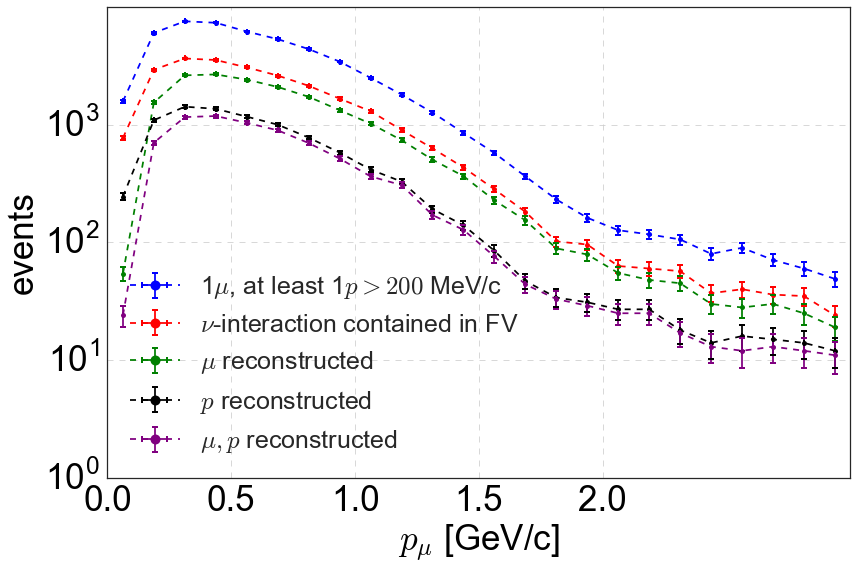

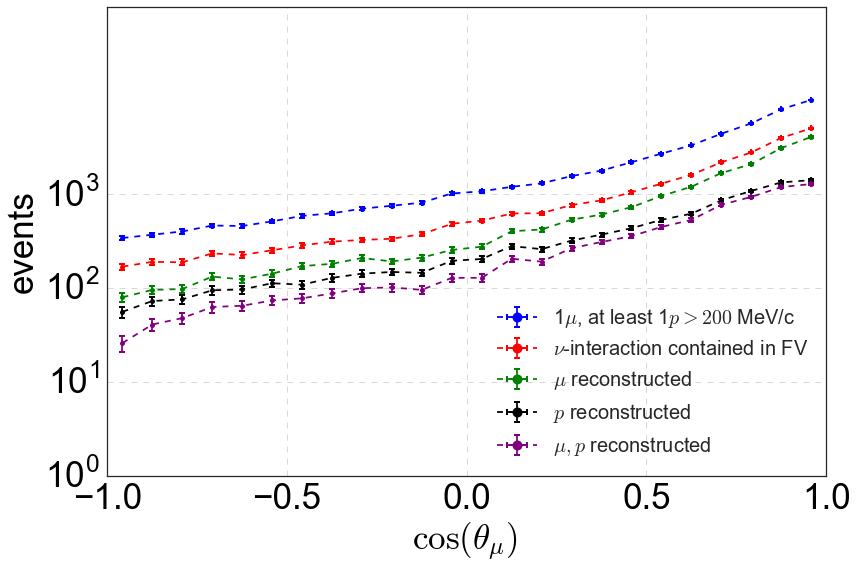

In [21]:
# fig:true_mup_truth_Pmu_momentum
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(0,3.,25)
for sample,label,color in zip(mupGENIEsamples,mupGENIElabels,mupGENIEcolors):
    h,bins,_=plt.hist(sample['truth_Pmu'],bins=bins,histtype='step',linewidth=0)
    mid = 0.5*(bins[1:] + bins[:-1])
    ax.errorbar( mid, h, yerr=np.sqrt(h), xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)
ax.legend(loc='lower left',fontsize=25,markerscale=2.)
ax.grid(linestyle='--',alpha=0.75)
set_axes(ax,x_label=r'$p_{\mu}$ [GeV/c]',y_label='events',fontsize=35)
ax.xaxis.set_ticks(np.linspace(0,2,5))
ax.set_yscale('log'); ax.yaxis.set_ticks([1,10,100,1000])
plt.tight_layout()
plt.savefig(figures_path+'true_mup_truth_Pmu_momentum.pdf')

# fig:true_mup_cos_truth_Pmu_theta
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(-1,1,25)
for sample,label,color in zip(mupGENIEsamples,mupGENIElabels,mupGENIEcolors):
    h,bins,_=plt.hist(np.cos(sample['truth_Pmu_theta']),bins=bins,histtype='step',linewidth=0)
    mid = 0.5*(bins[1:] + bins[:-1])
    ax.errorbar( mid, h, yerr=np.sqrt(h), xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)
ax.legend(loc='lower right',fontsize=20,markerscale=2.)
ax.grid(linestyle='--',alpha=0.75)
set_axes(ax,x_label='$\\cos(\\theta_{\\mu})$ ',y_label='events',fontsize=35)
ax.xaxis.set_ticks(np.linspace(-1,1,5))
ax.set_yscale('log'); ax.yaxis.set_ticks([1,10,100,1000])
plt.tight_layout()
plt.savefig(figures_path+'true_mup_cos_truth_Pmu_theta.pdf')

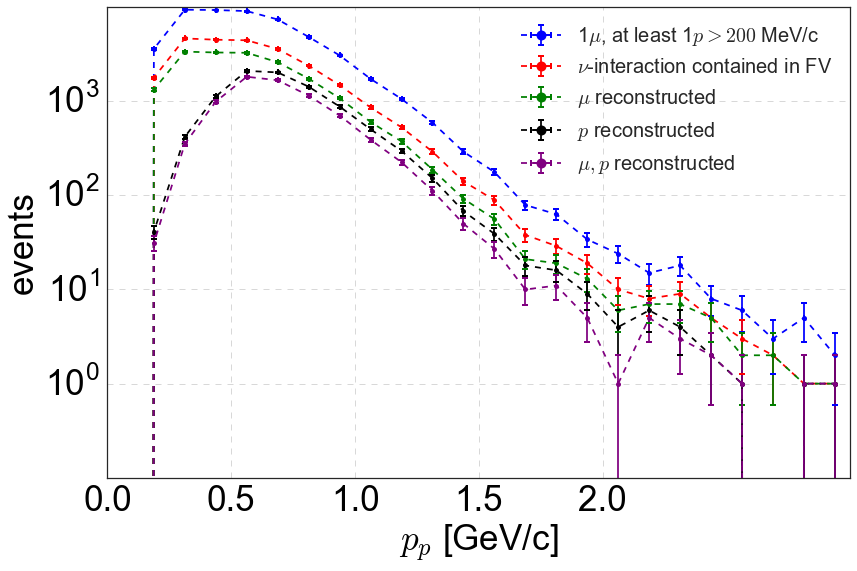

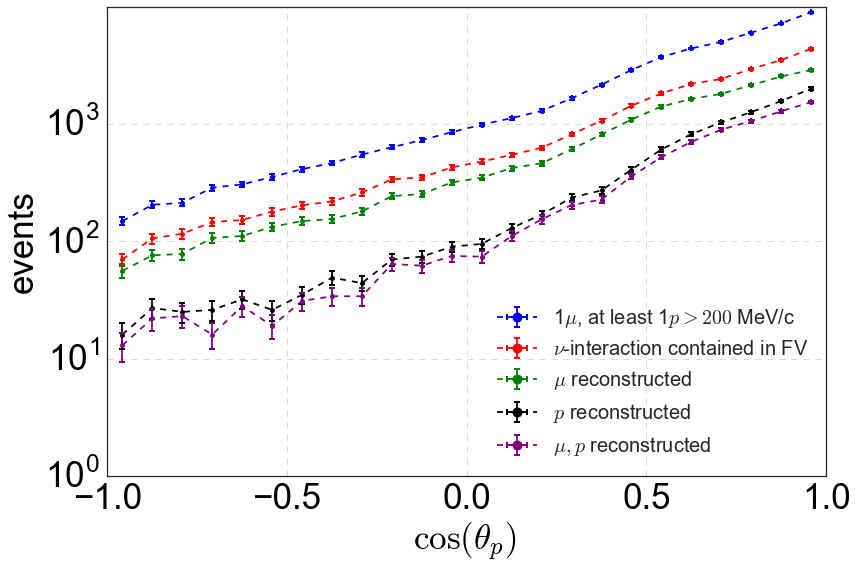

In [22]:
# fig:true_mup_truth_Pmu_momentum
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(0,3.,25)
for sample,label,color in zip(mupGENIEsamples,mupGENIElabels,mupGENIEcolors):
    h,bins,_=plt.hist(sample['truth_Pp'],bins=bins,histtype='step',linewidth=0)
    mid = 0.5*(bins[1:] + bins[:-1])
    ax.errorbar( mid, h, yerr=np.sqrt(h), xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)
ax.legend(loc='upper right',fontsize=20,markerscale=2.)
ax.grid(linestyle='--',alpha=0.75)
set_axes(ax,x_label='$p_{p}$ [GeV/c]',y_label='events',fontsize=35)
ax.xaxis.set_ticks(np.linspace(0,2,5))
ax.set_yscale('log'); ax.yaxis.set_ticks([1,10,100,1000])
plt.tight_layout()
plt.savefig(figures_path+'true_mup_truth_Pp_momentum.pdf')

# fig:true_mup_cos_truth_Pp_theta
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(-1,1,25)
for sample,label,color in zip(mupGENIEsamples,mupGENIElabels,mupGENIEcolors):
    h,bins,_=plt.hist(np.cos(sample['truth_Pp_theta']),bins=bins,histtype='step',linewidth=0)
    mid = 0.5*(bins[1:] + bins[:-1])
    ax.errorbar( mid, h, yerr=np.sqrt(h), xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)
ax.legend(loc='lower right',fontsize=20,markerscale=2.)
ax.grid(linestyle='--',alpha=0.75)
set_axes(ax,x_label='$\\cos(\\theta_{p})$ ',y_label='events',fontsize=35)
ax.xaxis.set_ticks(np.linspace(-1,1,5))
ax.set_yscale('log'); ax.yaxis.set_ticks([1,10,100,1000])
plt.tight_layout()
plt.savefig(figures_path+'true_mup_cos_truth_Pp_theta.pdf')

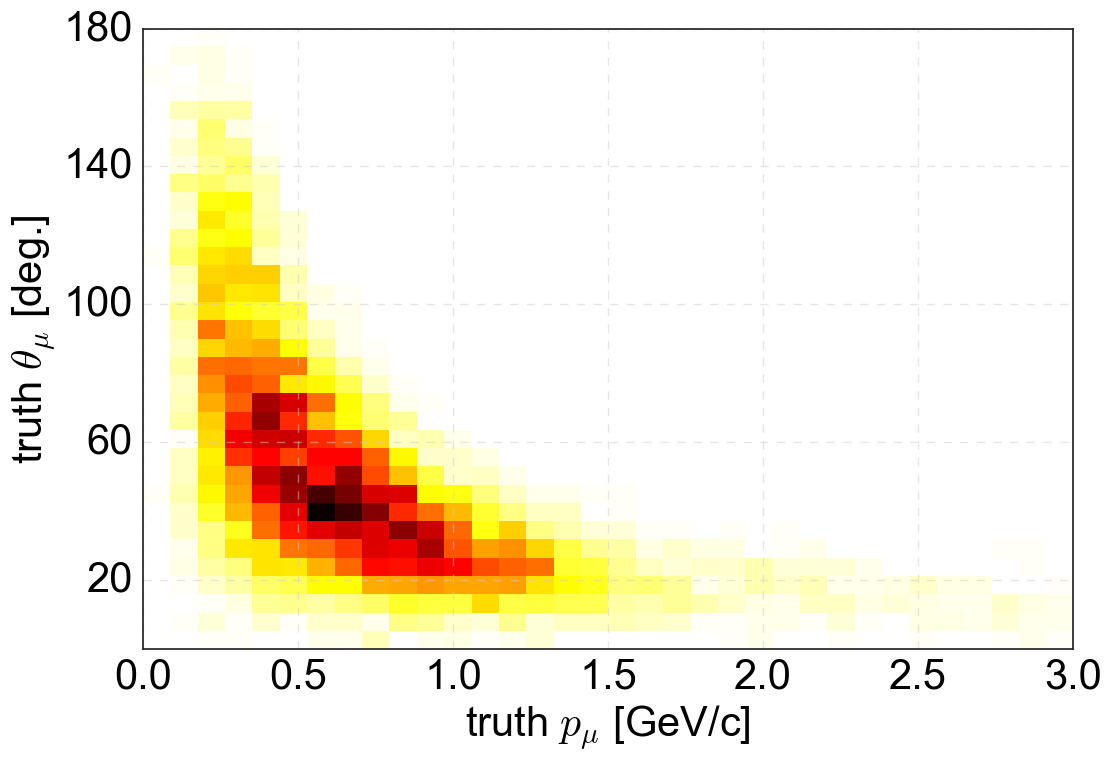

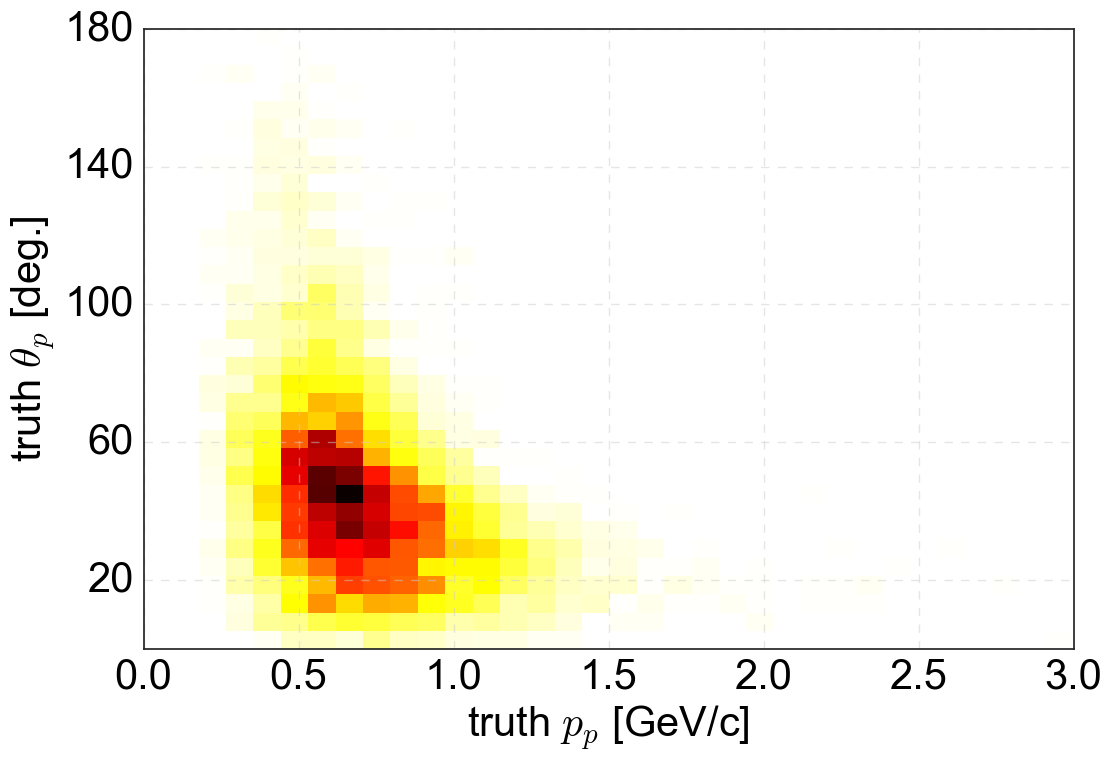

In [52]:
# fig:truth_Pmu_theta_mu
fig,ax = plt.subplots(figsize=(12,8))
bins = (np.linspace(0,3,35),np.linspace(0,180,35))
sample=mupGENIE['IsVertexReconstructed']
plot_2d_hist(sample['truth_Pmu'],180./np.pi*sample['truth_Pmu_theta']
             ,bins=bins,ax=ax)
ax.grid(linestyle='--',alpha=0.5)
set_axes(ax,x_label='truth $p_{\\mu}$ [GeV/c]',y_label='truth $\\theta_{\\mu}$ [deg.]'
         ,yticks=[20,60,100,140,180]
         ,fontsize=30)
plt.savefig(figures_path+'truth_Pmu_theta_mu.pdf')

# fig:truth_Pmu_theta_p
fig,ax = plt.subplots(figsize=(12,8))
bins = (np.linspace(0,3,35),np.linspace(0,180,35))
sample=mupGENIE['IsVertexReconstructed']
plot_2d_hist(sample['truth_Pp'],180./np.pi*sample['truth_Pp_theta']
             ,bins=bins,ax=ax)
ax.grid(linestyle='--',alpha=0.5)
set_axes(ax,x_label='truth $p_{p}$ [GeV/c]',y_label='truth $\\theta_{p}$ [deg.]'
         ,yticks=[20,60,100,140,180]
         ,fontsize=30)
plt.savefig(figures_path+'truth_Pmu_theta_p.pdf')